In [ ]:
%load_ext autoreload
%autoreload 2

# 2. Image transformation and least squares fitting
In the previous exercises you have implemented functions for computing transformation matrices and applied them to geometric objects. In these exercises you will first write a Python function that performs image transformation by the inverse mapping method. Then, you will implement a function that performs linear least squares fitting. All necessary information for implementing these functions can be found in the lecture slides. You can use the functions that you implement in this section to perform point-based affine image registration in the project work.


## 2.1. Image transformation by inverse mapping
Transforming an image results to transforming the locations of the image pixels. The most obvious method for transforming an image is to apply the geometric transformation to all pixel locations in an input image (the image that is being transformed) in order to determine where those pixel should be located in the output image (the transformed image) and then "fill in" the corresponding intensity values. This approach is called forward mapping and is illustrated in the figure below.

<img src="../notebooks/assets/forward_mapping.png" width="500" height="300" align="center"/>
<p style="font-size:8px;"> Figure from <a href="https://blogs.mathworks.com/steve/2006/05/05/spatial-transformations-inverse-mapping/">"Steve on Image Processing and MATLAB"</a>.</p>

The forward mapping method can be problematic as some pixels in the output image might not "receive" a value (resulting in gaps), while some pixels might "receive" multiple values (resulting in overlaps) from the input image. These problems can be avoided by using an approach called inverse mapping illustrated in the figure below. Inverse mapping works by transforming the locations of the output image back to the original image by applying the inverse of the geometric transformation. The values for the pixels of the transformed image can be obtained by interpolation at the determined location in the original image. This avoids the problem of gaps and multiple values of the forward mapping method.

<img src="../notebooks/assets/inverse_mapping.png" width="500" height="300" align="center"/>
<p style="font-size:8px;"> Figure from <a href="https://blogs.mathworks.com/steve/2006/05/05/spatial-transformations-inverse-mapping/">"Steve on Image Processing and MATLAB"</a>.</p>

### (A)
### QUESTION:
How can you compute the inverse of an affine transformation represented with a transformation matrix?

### (B)
### QUESTION:
A template for implementing an image transformation function with inverse mapping is provided in the `image_transform()` function in `# Section 2` of the `registration.py` module. Read the documentation for the `numpy.meshgrid()` function that is used in the first part of this function (you can quickly look up the documentation by on the Internet). Briefly explain what the following line of code does (what are the inputs and outputs?):

```python
x = np.arange(0, output_shape[1])
y = np.arange(0, output_shape[0])
xx, yy = np.meshgrid(x, y)
```

### (C)
### EXERCISE:
Implement the missing functionality in the `image_transform()` function. It is only missing a few lines of code that performs inverse mapping of the coordinates, and tests for exceptions.

### (D)
### EXERCISE:
To test your implementation, run `image_transform_test()` from `# SECTION 2` of the `registration_tests.py` module and make sure that the output matches the result in the figure below.

<img src="../notebooks/assets/image_transform_test.png" width="600" height="300" align="center"/>


In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import image_transform_test

image_transform_test()

### QUESTION:
Assuming you have implemented the missing functionality correctly, will the following line of code:

```python
It = image_transform(I, t2h(rotate(pi/4), [0 0]))
```
result in an apparent clockwise or counter-clockwise rotation of the image? Motivate your answer. (Hint: think about the coordinate system of the image, also shown in the figures illustrating forward and inverse mapping above.)

## 2.2. Least-squares solution to an overdetermined system of linear equations

A set of linear equations can be written in matrix form in the following way:

\begin{equation*}
\left\{\begin{array}{c}{a_{1,1} w_{1}+a_{1,2} w_{2}+\ldots+a_{1, n} w_{n}=b_{1}} \\ {a_{2,1} w_{1}+a_{2,2} w_{2}+\ldots+a_{2, n} w_{n}=b_{2}} \\ {\vdots} \\ {a_{m, 1} w_{1}+a_{m, 2} w_{2}+\ldots+a_{m, n} w_{n}=b_{m}}\end{array}\right.
\end{equation*}

\begin{equation}
\left[ \begin{array}{cccc}{a_{1,1}} & {a_{1,2}} & {\ldots} & {a_{1, n}} \\ {a_{2,1}} & {a_{2,2}} & {\dots} & {a_{2, n}} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {a_{m, 1}} & {a_{m, 2}} & {\dots} & {a_{m, n}}\end{array}\right] \left[ \begin{array}{c}{w_{1}} \\ {w_{2}} \\ {\vdots} \\ {w_{n}}\end{array}\right]=\left[ \begin{array}{c}{b_{1}} \\ {b_{2}} \\ {\vdots} \\ {b_{m}}\end{array}\right]
\end{equation}

\begin{equation}
\mathbf{A w}=\mathbf{b}
\end{equation}

where $\mathbf{w}$ is an $n x 1$ column-vector of the unknown variables $w_{i}$, $\mathbf{A}$ is an $m x n$ matrix of the known coefficients and $a_{i, j}$ and $\mathbf{b}$ is an $m x 1$ column-vector of the known constant terms $b_{i}$. Solving the set of equations means finding the values of $w_{i}$ that satisfy the set of equations.
- When $m < n$ the equations have no unique solution.
- When $m = n$ the equations have a unique solution.
- When $m > n$ the equations are overconstrained and there may not be an exact solution for **z**. In this case, what is often consider is minimization of the squared error:

\begin{equation}
E^{2}=\|\mathbf{A} \mathbf{w}-\mathbf{b}\|_{2}^{2}
\end{equation}

$\|\mathbf{A} \mathbf{w}-\mathbf{b}\|_{2}^{2}$ is a convex function in $\mathbf{w}$ and its solution can be found by setting the expression for the derivative with respect to the unknowns $\mathbf{w}$ to zero. The solution for $\mathbf{w}$ obtained in this way is:

\begin{equation}
\mathbf{w}=\left(\mathbf{A}^{\top} \mathbf{A}\right)^{-1} \mathbf{A}^{\top} \mathbf{b}
\end{equation}

If you are curious to see how this solution is obtained, refer to section 4.4 of the provided "Linear Algebra Review and Reference" document in Canvas (it can be found in the Resources page). NOTE: Here we use the notation $w_{i}$ for the unknown variables instead of the more common $x_{i}$ so there is no confusion with the notation that we use for point coordinates. When you later apply least-squares to solve for the affine transformation matrix the point coordinates will actually be the known values and the unknown variables will be the elements of the transformation matrix.

### (A)
### EXERCISE:
In `# SECTION 2` of the `registration.py` module, `ls_solve()` contains a template for a function that finds the least squares solution for $\mathbf{w}$. Implement the missing functionality.

### (B)
### EXERCISE:
Test your implementation by solving the following system of equations:

\begin{equation}
\left\{\begin{aligned} 3 w_{1}+4 w_{2} &=1 \\ 5 w_{1}+6 w_{2} &=2 \\ 7 w_{1}+8 w_{2} &=3 \\ 17 w_{1}+10 w_{2} &=4 \end{aligned}\right.
\end{equation}

In order to do so, you have to create the $\mathbf{A}$ matrix and the $\mathbf{B}$ vector in Python and then call the `ls_solve()` function. Implement your code in the `ls_solve_test()` script in the `registration_tests.py` module.

The found solution should be $\mathrm{w}=[0.0694,0.2842]^{\top}$.

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import ls_solve_test

ls_solve_test()

w:
[[0.06941839]
 [0.28424015]]

E:
[[0.18011257]]



### QUESTION:
For which equation does the solution result in the largest error?

## 2.3. Least-squares fitting of an affine transformation

In point-based image registration, the goal is to find a transformation that aligns the moving with the fixed image given a set of corresponding points in the two images. In the case of affine registration, we make an assumption that the two sets of points are related trough the transformation matrix in the following way:

\begin{equation}
\mathbf{T X}^{\prime}=\mathbf{X}
\end{equation}

\begin{equation}
\left[ \begin{array}{ccc}{w_{1}} & {w_{2}} & {w_{3}} \\ {w_{4}} & {w_{5}} & {w_{6}} \\ {0} & {0} & {1}\end{array}\right] \left[ \begin{array}{cccc}{x_{1}^{\prime}} & {x_{2}^{\prime}} & {\ldots} & {x_{n}^{\prime}} \\ {y_{1}^{\prime}} & {y_{2}^{\prime}} & {\ldots} & {y_{n}^{\prime}} \\ {1} & {1} & {\ldots} & {1}\end{array}\right]=\left[ \begin{array}{cccc}{x_{1}} & {x_{2}} & {\ldots} & {x_{n}} \\ {y_{1}} & {y_{2}} & {\ldots} & {y_{n}} \\ {1} & {1} & {\ldots} & {1}\end{array}\right]
\end{equation}

In the previous expression, $\left\{x_{i}, y_{i}\right\}$ are the coordinates of the points in the fixed image, $\left\{x_{i}^{\prime}, y_{i}^{\prime}\right\}$ are the coordinates of the corresponding points in the moving image and $w_{i}$ are the elements of the transformation matrix (for example, $w_{3}$ and $w_{6}$ are the translation parameters). If we transpose both sides of this equation, it will immediately become obvious that this expression defines two systems of linear equations:

\begin{equation}
\left[ \begin{array}{ccc}{x_{1}^{\prime}} & {y_{1}^{\prime}} & {1} \\ {x_{2}^{\prime}} & {y_{2}^{\prime}} & {1} \\ {\vdots} & {\vdots} & {\vdots} \\ {x_{m}^{\prime}} & {y_{m}^{\prime}} & {1}\end{array}\right] \left[ \begin{array}{ccc}{w_{1}} & {w_{4}} & {0} \\ {w_{2}} & {w_{5}} & {0} \\ {w_{3}} & {w_{6}} & {1}\end{array}\right]=\left[ \begin{array}{ccc}{x_{1}} & {y_{1}} & {1} \\ {x_{2}} & {y_{2}} & {1} \\ {\vdots} & {\vdots} & {\vdots} \\ {x_{m}} & {y_{m}} & {1}\end{array}\right]
\end{equation}

The two systems of equations are:

\begin{equation}
\left[ \begin{array}{ccc}{x_{1}^{\prime}} & {y_{1}^{\prime}} & {1} \\ {x_{2}^{\prime}} & {y_{2}^{\prime}} & {1} \\ {\vdots} & {\vdots} & {\vdots} \\ {x_{m}^{\prime}} & {y_{m}^{\prime}} & {1}\end{array}\right] \left[ \begin{array}{c}{w_{1}} \\ {w_{2}} \\ {w_{3}}\end{array}\right]=\left[ \begin{array}{c}{x_{1}} \\ {x_{2}} \\ {\vdots} \\ {x_{n}}\end{array}\right], \text { and } \left[ \begin{array}{ccc}{x_{1}^{\prime}} & {y_{1}^{\prime}} & {1} \\ {x_{2}^{\prime}} & {y_{2}^{\prime}} & {1} \\ {\vdots} & {\vdots} & {\vdots} \\ {x_{m}^{\prime}} & {y_{m}^{\prime}} & {1}\end{array}\right] \left[ \begin{array}{c}{w_{4}} \\ {w_{5}} \\ {w_{6}}\end{array}\right]=\left[ \begin{array}{c}{y_{1}} \\ {y_{2}} \\ {\vdots} \\ {y_{m}}\end{array}\right]
\end{equation}

The first system gives the solution for $w_{1}$, $w_{2}$ and $w_{3}$. Similarly, the second system gives
the solution for $w_{4}$, $w_{5}$ and $w_{6}$.

### (A)
### EXERCISE:
Implement least squares fitting of an affine transform in the provided `ls_affine()` function template in `# SECTION 2` of the `registration.py` module. You have to form the $\mathbf{b}$ vector for the two systems of equations. The $\mathbf{A}$ matrix is the same for both systems and already implemented with the line $A = Xm'$. Then call `ls_solve()` to solve the two systems. Finally, you have to use the computed parameters to form a homogeneous transformation matrix (e.g. the first row of the transformation matrix will be the solution for the first linear system of equations). 

Test your implementation by calling `ls_affine_test()` from `# SECTION 2` of the `registration_tests.py` module. This function applies some arbitrary affine transformation to a test object, and then transforms the object back to the original with a transformation that is computed with `ls_affine()`. If your implementation is correct the retrieved object should match the original object in the displayed figure.

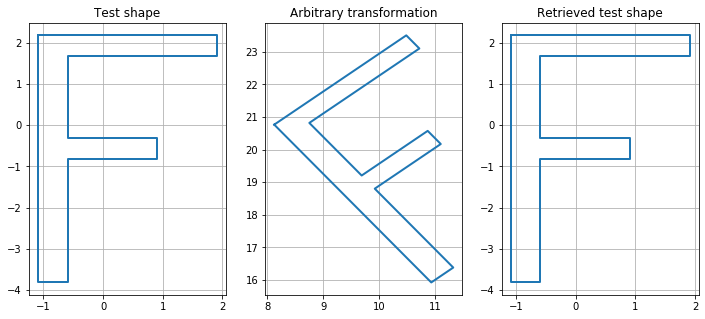

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import ls_affine_test

ls_affine_test()

### (B)
### QUESTION:
What is the minimum number of corresponding point pairs needed to fit a 2D affine transform? How about 3D? Motivate your answer.